In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Churn Analysis.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#data inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#total charge field replace with 0 when tenure is 0

In [4]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
data.duplicated().sum()

0

In [8]:
data["customerID"].duplicated().sum()

0

In [9]:
def convert(value):
    if value==1:
        return "Yes"
    else:
        return "No"
data["SeniorCitizen"]=data["SeniorCitizen"].apply(convert)

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#converted 0 and 1 as (yes/no)for senior citizen 

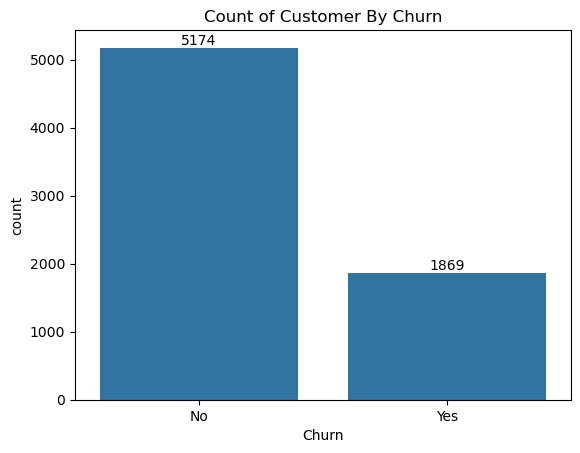

In [11]:
ax=sns.countplot(x=data["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer By Churn")
plt.show()

       Churn
Churn       
No      5174
Yes     1869


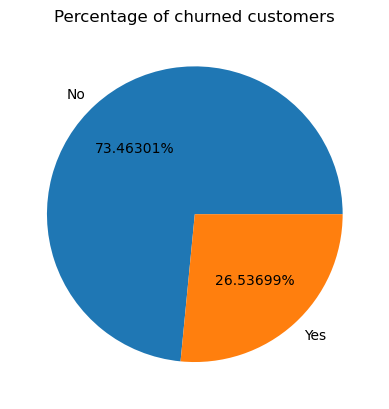

In [12]:
gb=data.groupby("Churn").agg({'Churn':'count'})
print(gb)
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.5f%%")
plt.title("Percentage of churned customers")
plt.show()

#from the given chart we conclude 26.54% customer churned out and now we will see 
#why they churned out

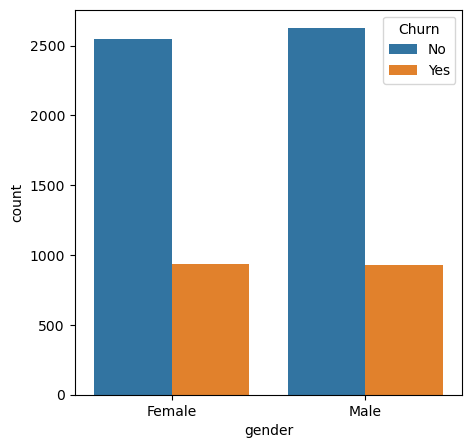

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x=data["gender"],data=data,hue="Churn")
plt.show()


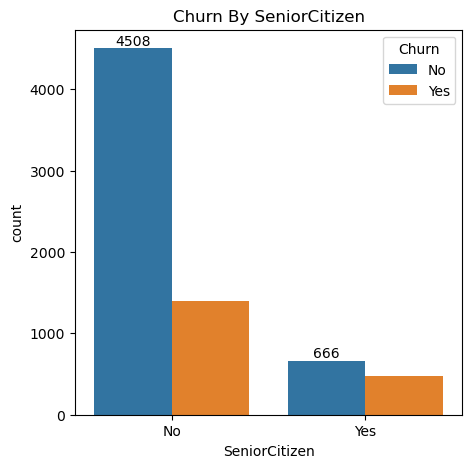

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=data["SeniorCitizen"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn By SeniorCitizen")
plt.show()

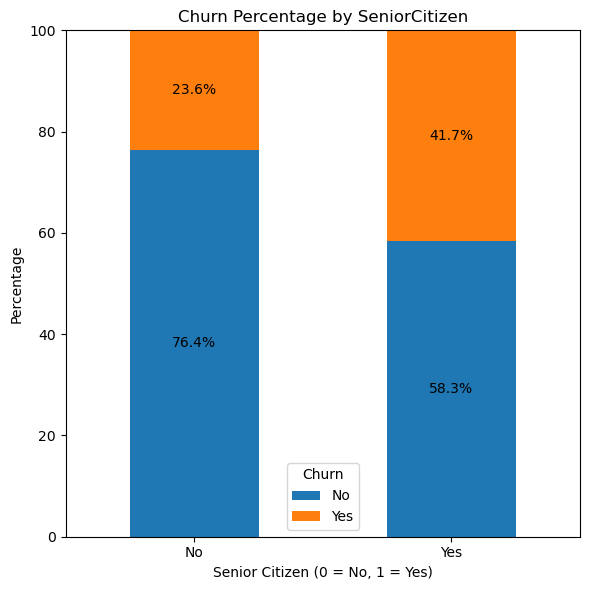

In [15]:
# Create a crosstab with counts
ct = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Convert counts to percentages (row-wise)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Ensure consistent order for Churn columns if not already sorted
ct_percent = ct_percent[['No', 'Yes']]  # or ['Yes', 'No'] depending on your preference

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e']

# Plot stacked bar chart
ax = ct_percent.plot(
    kind='bar', 
    stacked=True, 
    figsize=(6,6), 
    color=custom_colors
)

# Add percentage labels to the bars
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

# Formatting
plt.title("Churn Percentage by SeniorCitizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#most of the seniorcitizen have churned out compared to others

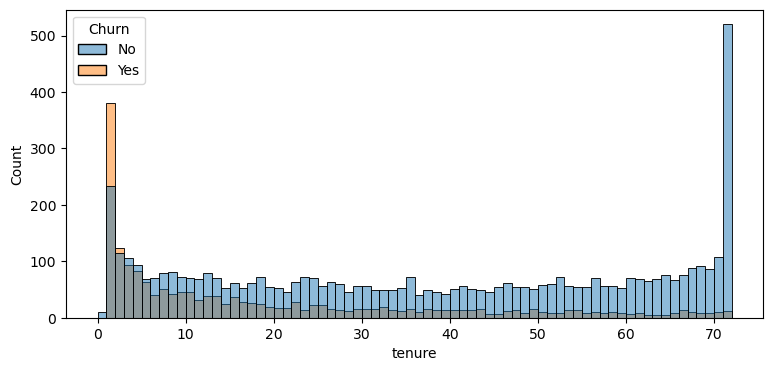

In [16]:
plt.figure(figsize=(9,4))
sns.histplot(x=data["tenure"],data=data,hue="Churn",bins=72)
plt.show()

#people who are using our services for only 1 to 2 months they churned out and people who are using our services for long time they did not churn out

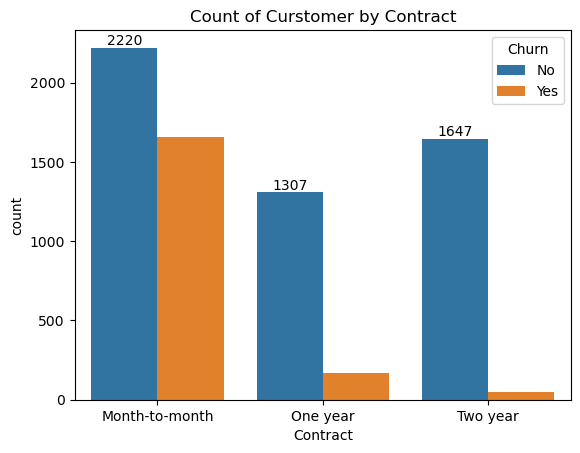

In [17]:
ax=sns.countplot(x=data["Contract"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Curstomer by Contract")
plt.show()

#people who are taking contract of 1-2 month are likly to churn out rather then people who are taking contract of 1 or 2 Year

In [18]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

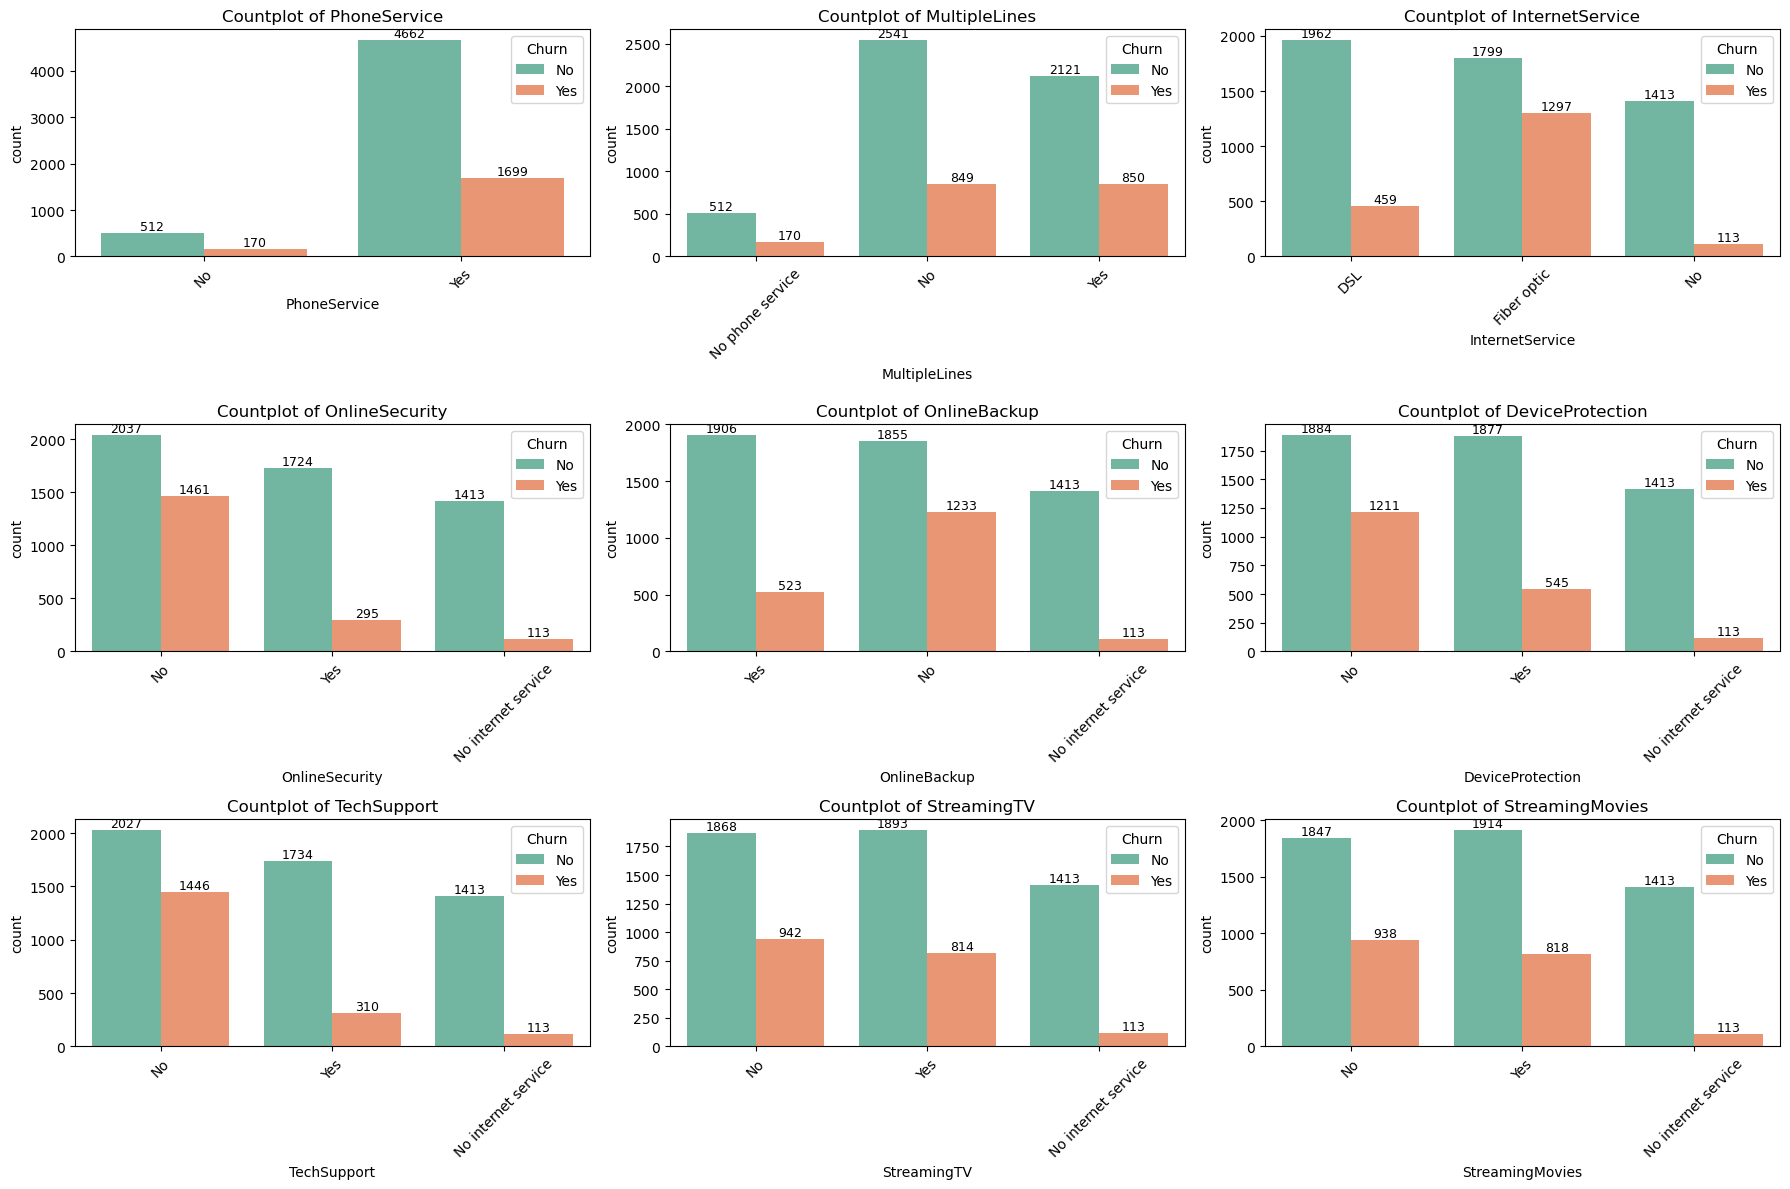

In [19]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Plot each countplot in a subplot
for i, col in enumerate(cols):
    sns.countplot(x=data[col],data=data,ax=axes[i], palette='Set2',hue="Churn")
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=9)

# Remove any unused axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The subplots illustrate the distribution of customer churn across various telecom services. Notably, customers without internet-related services (e.g., OnlineSecurity, TechSupport, etc.) show lower churn rates, while those using Fiber optic Internet or lacking online protection services tend to churn more. Services like PhoneService and MultipleLines show relatively minor impact on churn. Overall, value-added internet services correlate with customer retention.

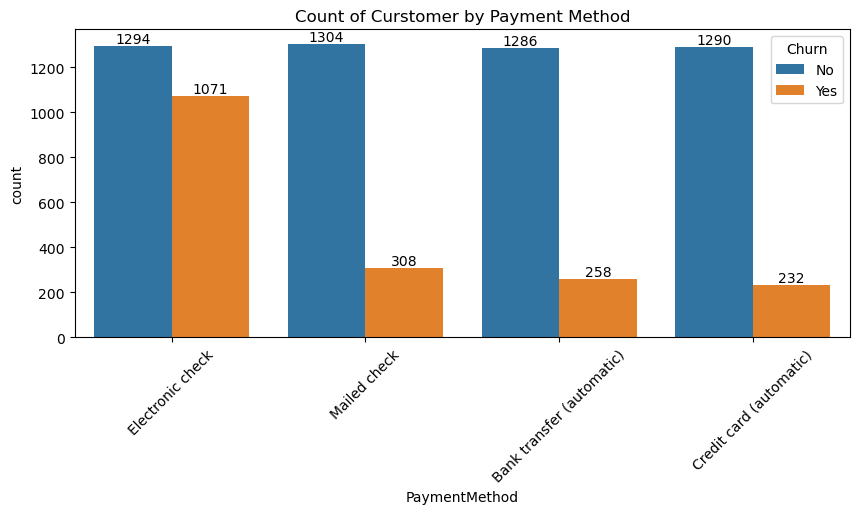

In [20]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x=data["PaymentMethod"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Curstomer by Payment Method")
plt.xticks(rotation=45)
plt.show()

#The customer is likly to churn who is using Electronic Check as Payment Method